### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

sns.set(style='ticks')
flatui = ['#9b59b6','#3498db','#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
flatui = sns.color_palette(flatui)

plt.style.use('fivethirtyeight')
sns.set(style='ticks')

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud

In [4]:
data = pd.read_csv("FIFA_data.csv")

In [5]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
data.shape

(18207, 89)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### Checking the missing values in each columns

In [8]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [9]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### Plotting the Heatmap of the columns using correlation matrix

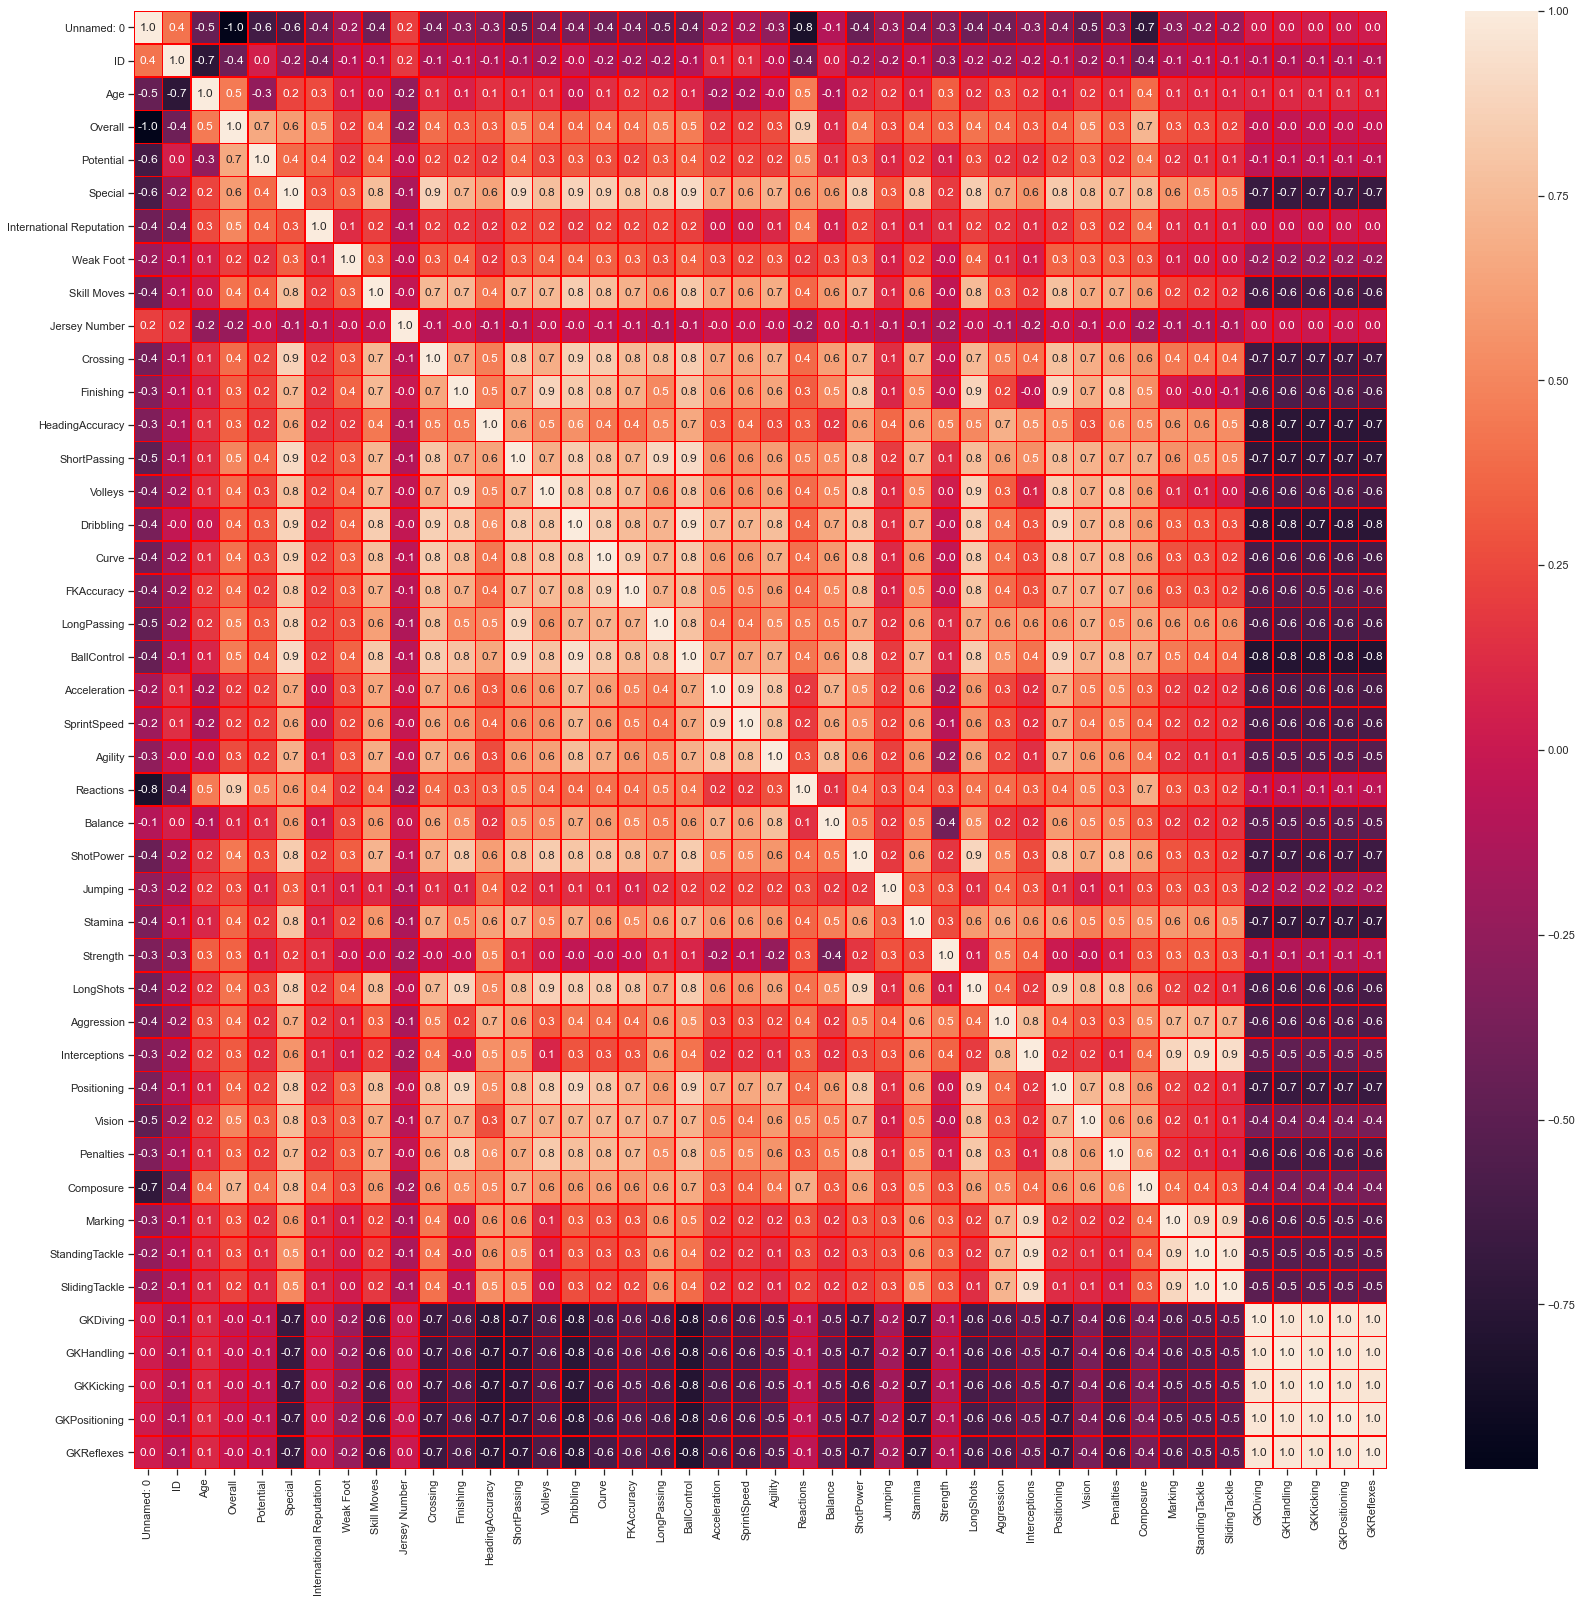

In [10]:
f,ax = plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor='red',fmt='.1f', ax=ax)
plt.show()

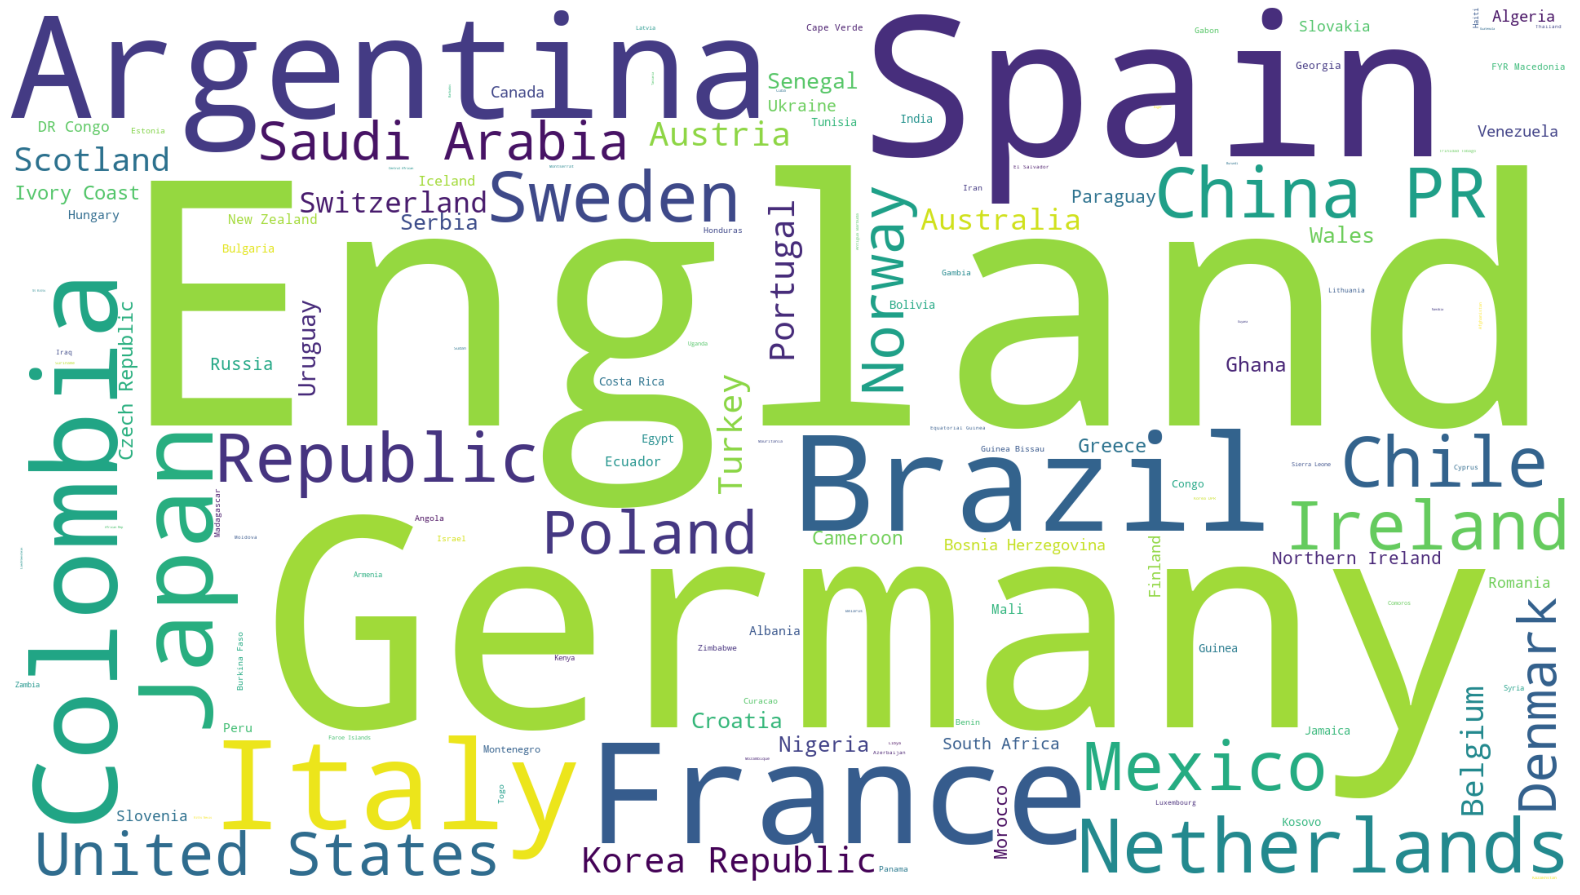

In [11]:
plt.subplots(figsize=(25,25))
wordcloud = WordCloud(
                            background_color = 'white',
                            width = 1920,
                            height = 1080
                        ).generate(" ".join(data.Nationality))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [12]:
data['Club'].isna().sum()

241

In [13]:
data['Position'].isna().sum()

60

In [14]:
data['Club'].fillna('No Club', inplace = True)
data['Position'].fillna('ST', inplace = True)

In [15]:
data['Club'].isna().sum()

0

In [16]:
data['Position'].isna().sum()

0

In [17]:
to_impute_by_mean = data.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [18]:
for i in to_impute_by_mean.columns:
    data[i].fillna(data[i].mean(), inplace = True)

In [19]:
'''These are categorical variables and will be imputed by mode.'''

to_impute_by_mode = data.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in to_impute_by_mode.columns:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [20]:
'''The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''

to_impute_by_median = data.loc[:, ['Weak Foot', 'Skill Moves']]
for i in to_impute_by_median.columns:
    data[i].fillna(data[i].median(), inplace = True)

In [21]:
data.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [22]:
''' Columns remaining to be imputed'''
data.columns[data.isna().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

### Filling the remaining missing values with zero

In [23]:
data.fillna(0, inplace = True)
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Functions to get the rounded values from different columns

In [24]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 'SlidingTackle']].mean().mean())))

def general(data):
    return int(round((data[['HeadingAccuracy','Dribbling','Curve','BallControl']].mean().mean())))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))


### Rename a column

In [25]:
data.rename(columns={'Club Logo': 'Club_Logo'}, inplace=True)

In [26]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1) 
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting']= data.apply(shooting, axis = 1)

In [28]:
# dataset after transformation
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,13.0,€196.4M,59,79,81,92,81,76,92,85


### creating the players dataset


In [29]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


### different positions acquired by the players

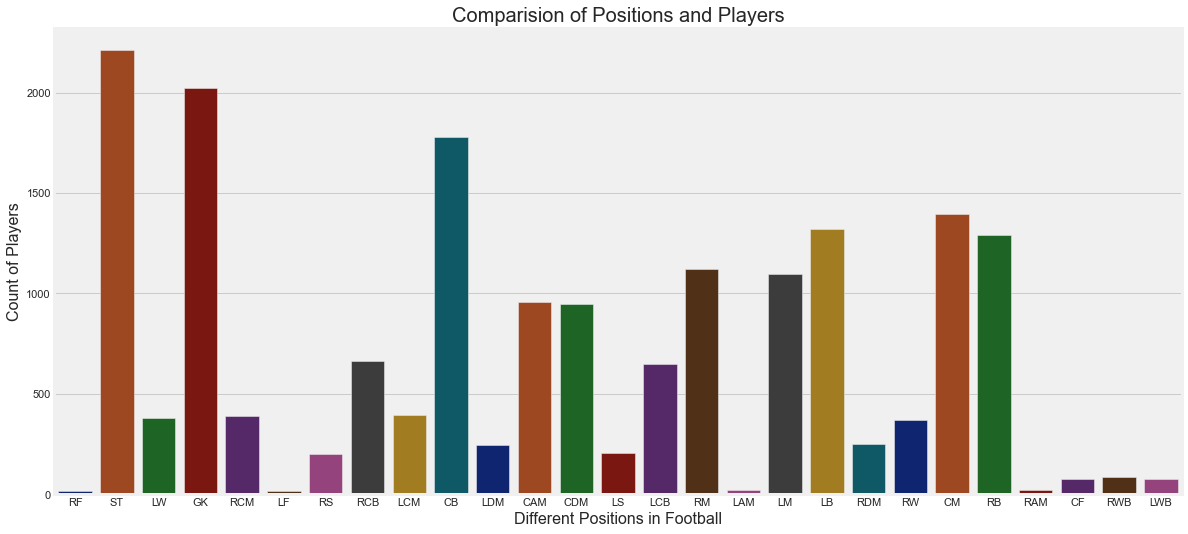

In [30]:
plt.figure(figsize = (18,8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data=data, palette = 'dark')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize =16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label ='Comparision of Positions and Players', fontsize =20)
plt.show()

### plotting count of players based on their heights

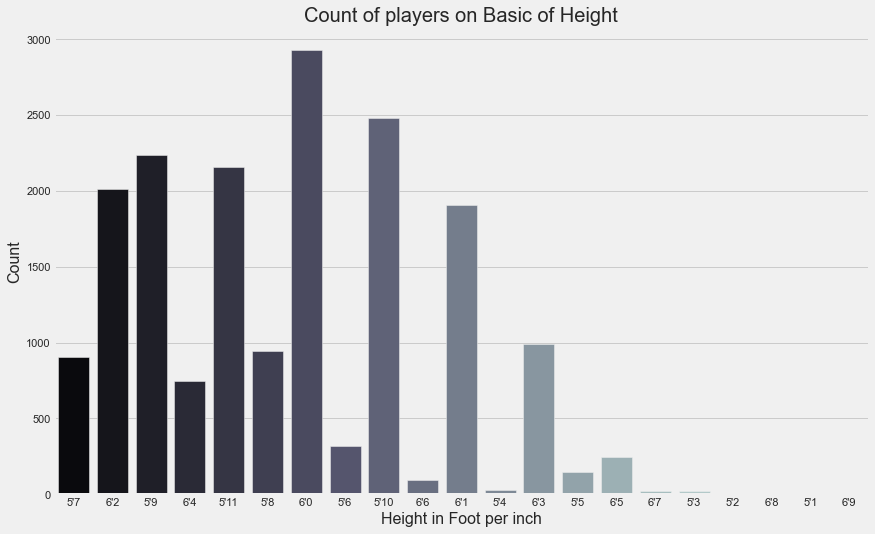

In [31]:
plt.figure(figsize =(13,8))
ax = sns.countplot(x = 'Height', data=data, palette ='bone')
ax.set_title(label = 'Count of players on Basic of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

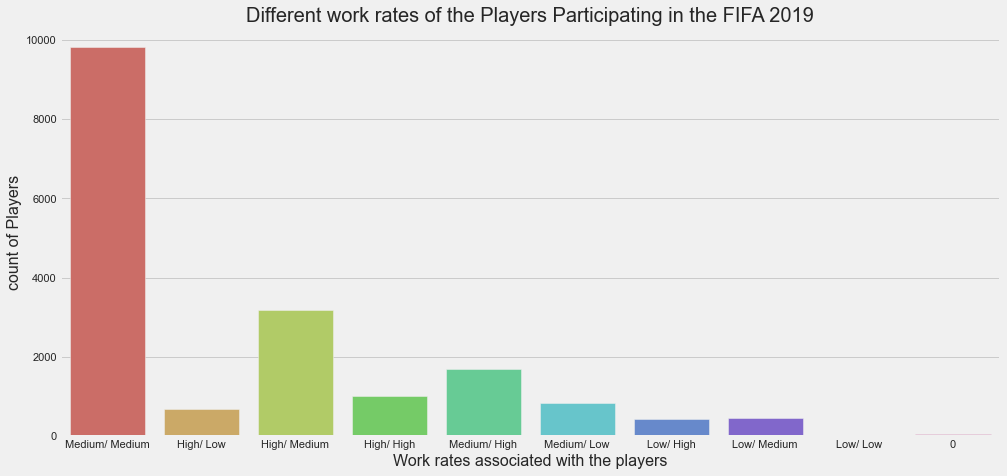

In [32]:
# To show different work rate of the players participating in the FIFA 2019

plt.figure(figsize =(15,7))
#plt.style.use('_classic_test')

sns.countplot(x = 'Work Rate', data=data, palette ='hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()


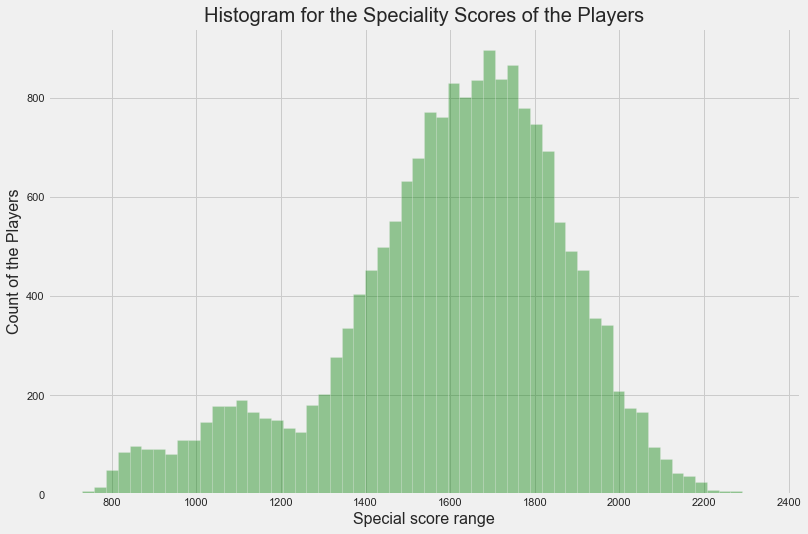

In [33]:

x = data.Special
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = False, color = 'green')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

In [34]:
data.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

### Every Nations' player and their overall scores


In [35]:
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]
data_countries.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,11.0,€104.6M,90,78,77,74,78,82,91,68
14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,10.0,€121.3M,89,66,83,78,84,85,90,61
15,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,8.0,€153.5M,21,85,67,81,87,76,92,86
16,16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,...,11.0,€160.7M,43,82,75,79,76,80,90,85
17,17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,...,14.0,€165.8M,51,86,73,80,88,79,90,83
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,90.0,€123.3M,16,16,43,31,52,59,90,16
20,20,189511,Sergio Busquets,29,https://cdn.sofifa.org/players/4/19/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,89,89,FC Barcelona,...,13.0,€105.6M,85,76,85,78,64,70,89,59
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,...,87.0,€62.7M,13,29,42,43,62,59,89,20
23,23,153079,S. Agüero,30,https://cdn.sofifa.org/players/4/19/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,...,14.0,€119.3M,21,84,71,72,86,80,89,84


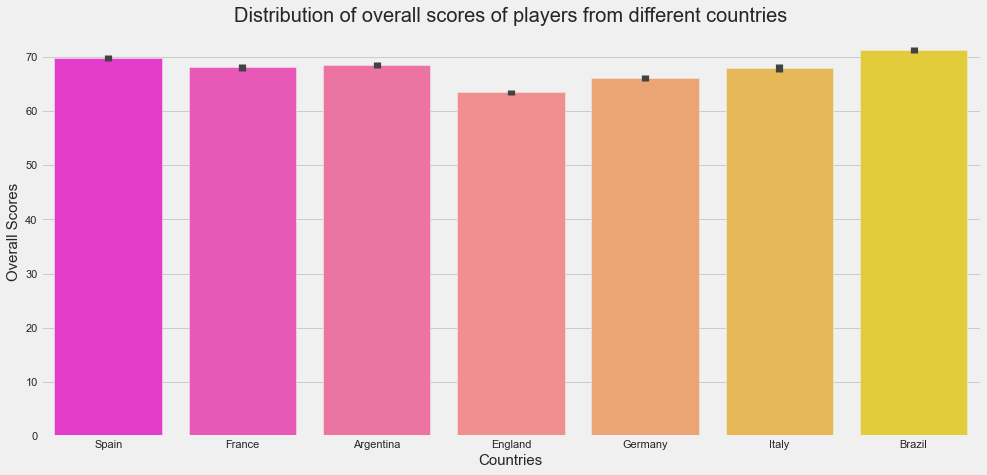

In [36]:
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 15)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 15)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

In [37]:
data.Club.value_counts()

No Club                 241
Fortuna Düsseldorf       33
RC Celta                 33
Cardiff City             33
Atlético Madrid          33
                       ... 
Sport Club do Recife     20
Botafogo                 20
Limerick FC              19
Sligo Rovers             19
Derry City               18
Name: Club, Length: 652, dtype: int64

In [38]:
copied_data = data.copy()

In [39]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid') # creating a tuple of club names

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

data_clubs.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,8.0,€172.1M,28,83,72,84,92,75,91,82
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,9.0,€137.4M,70,81,80,89,84,77,91,78
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,37.0,€164M,48,85,78,74,84,81,91,87
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,11.0,€104.6M,90,78,77,74,78,82,91,68
14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,10.0,€121.3M,89,66,83,78,84,85,90,61


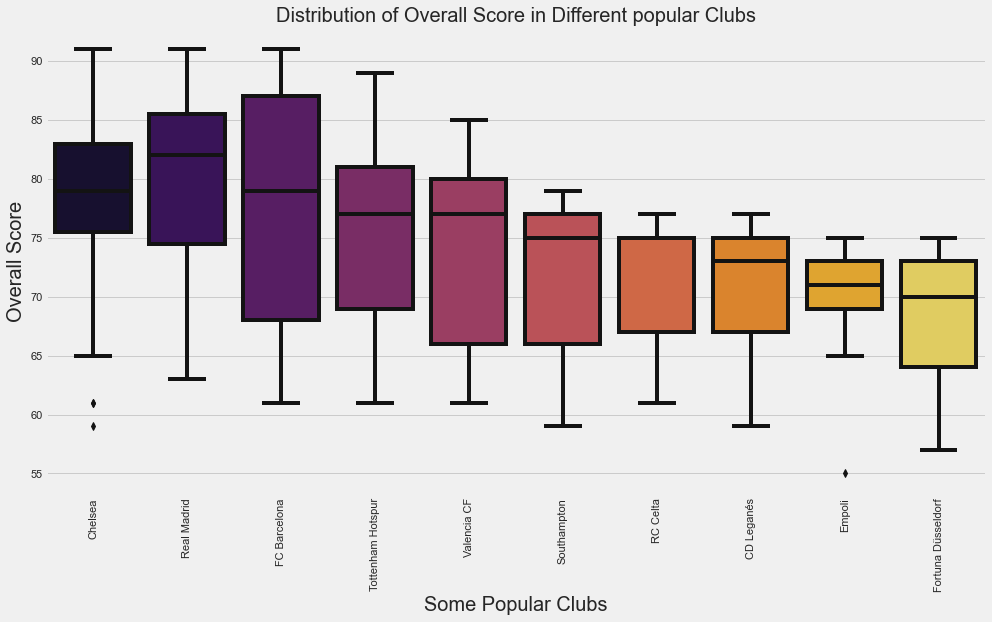

In [40]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette ='inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 20)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 20)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


### Finding out the top 10 left footed footballers


In [41]:
left = data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)
left

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


### Finding out the top 10 Right footed footballers


In [42]:
right = data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)
right

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


### Comparing the performance of left-footed and right-footed footballers ballcontrol vs dribbing

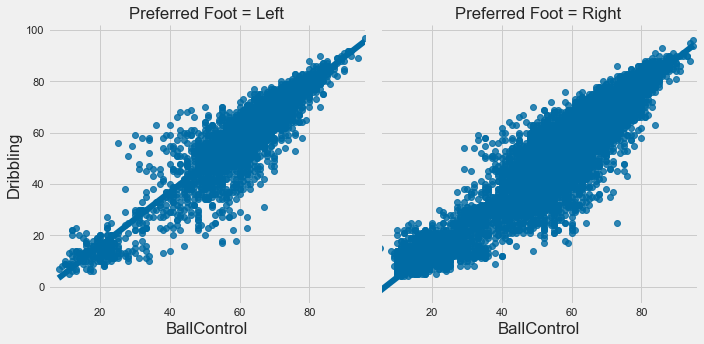

In [43]:
sns.lmplot(x = 'BallControl', y ='Dribbling', data=data, col = 'Preferred Foot')
plt.show()

In [44]:
# checking the clubs where players from the most number of nations play

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)


Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Napoli                    18
Empoli                    18
Eintracht Frankfurt       18
West Ham United           18
AS Monaco                 18
Lazio                     18
Name: Nationality, dtype: int64

In [45]:
# checking the clubs where players from the least number of nations play

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)


Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

In [46]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,13.0,€196.4M,59,79,81,92,81,76,92,85


In [47]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [48]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,13.0,€196.4M,59,79,81,92,81,76,92,85


### Player with maximum Potential and Overall Performance


In [49]:
player = str(data.loc[data['Potential'].idxmax()][1])
print('Maximum Potential : '+str(data.loc[data['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(data.loc[data['Overall'].idxmax()][1]))


Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


### Finding the best players for each performance criteria


In [50]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

i = 0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],data.loc[data[pr_cols[i]].idxmax()][1]))
    i += 1
    

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


### Creating a list of best players in each of the pr_cols criteria


In [51]:
i = 0
best = []
while i < len(pr_cols):
    best.append(data.loc[data[pr_cols[i]].idxmax()][1])
    i +=1

In [52]:
best

['K. De Bruyne',
 'L. Messi',
 'Naldo',
 'L. Modrić',
 'E. Cavani',
 'L. Messi',
 'Quaresma',
 'L. Messi',
 'T. Kroos',
 'L. Messi',
 'Douglas Costa',
 'K. Mbappé',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernard',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'N. Kanté',
 'A. Akinfenwa',
 'L. Messi',
 'B. Pearson',
 'N. Kanté',
 'Cristiano Ronaldo',
 'L. Messi',
 'M. Balotelli',
 'L. Messi',
 'A. Barzagli',
 'G. Chiellini',
 'Sergio Ramos',
 'De Gea',
 'J. Oblak',
 'M. Neuer',
 'G. Buffon',
 'De Gea']

### Plot to show the preferred foot choice of different players


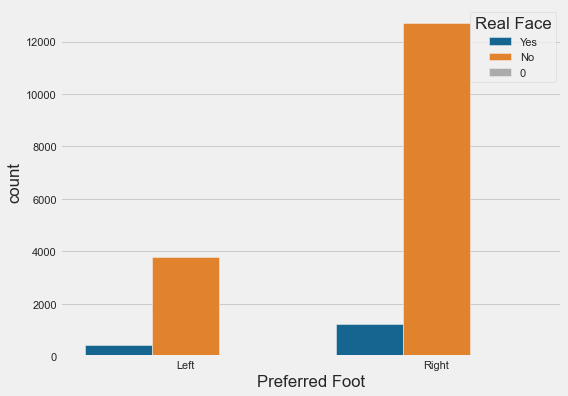

In [53]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=data)
plt.show()

In [54]:
# Finding the player with the maximum potential

data.loc[data['Potential'].idxmax()][1]

'K. Mbappé'

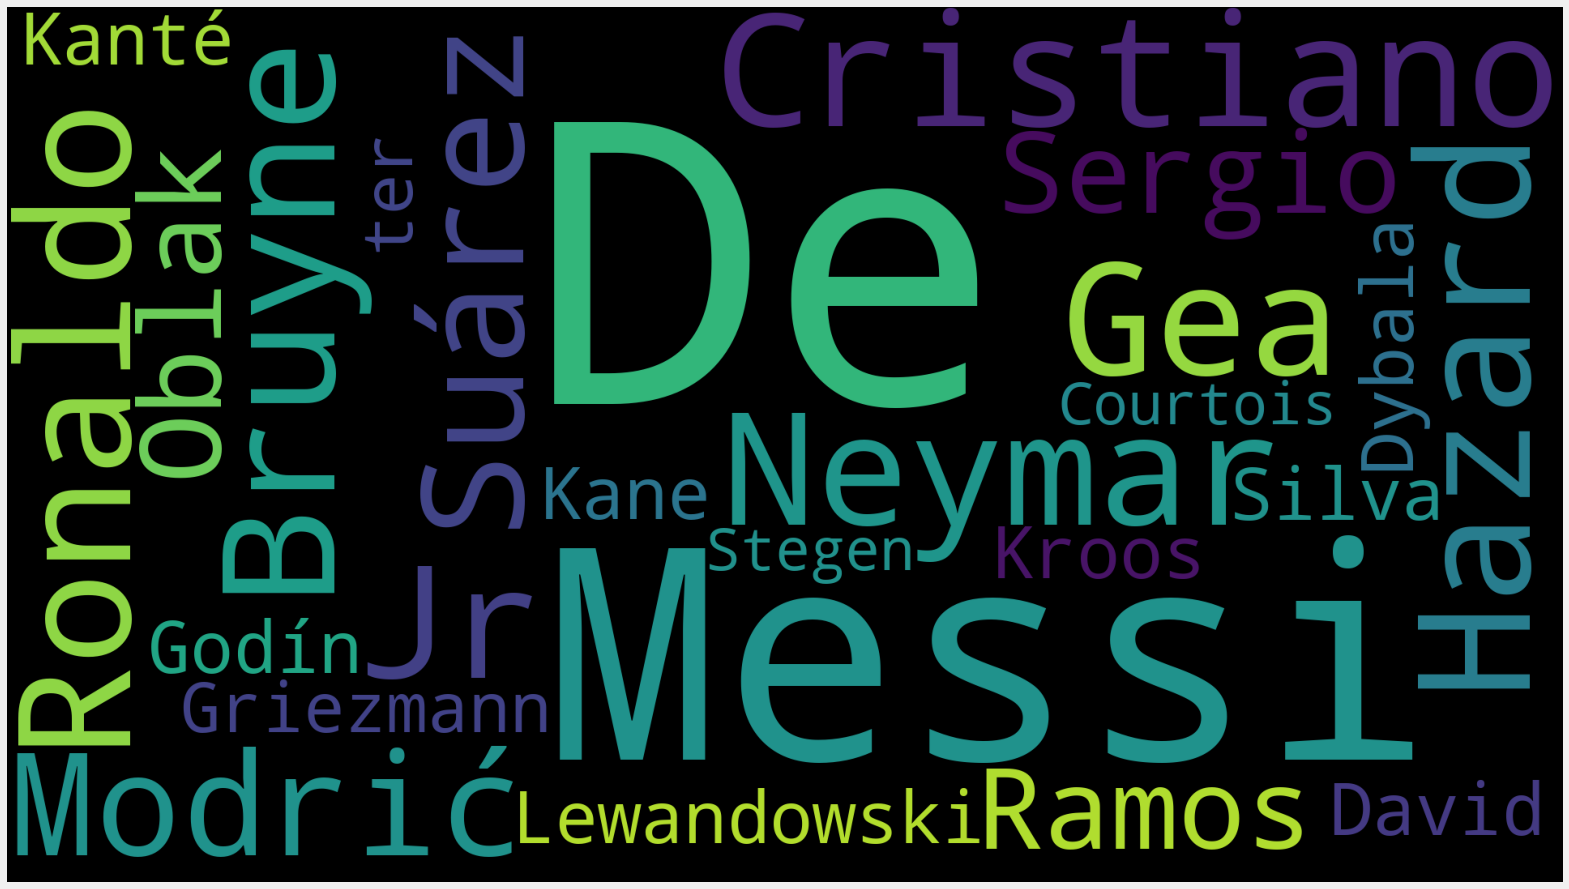

In [55]:
# showing the name of the players which occurs the most number of times from the first 20 names
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Name[0:20]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

### Checking which clubs have been mentioned the most


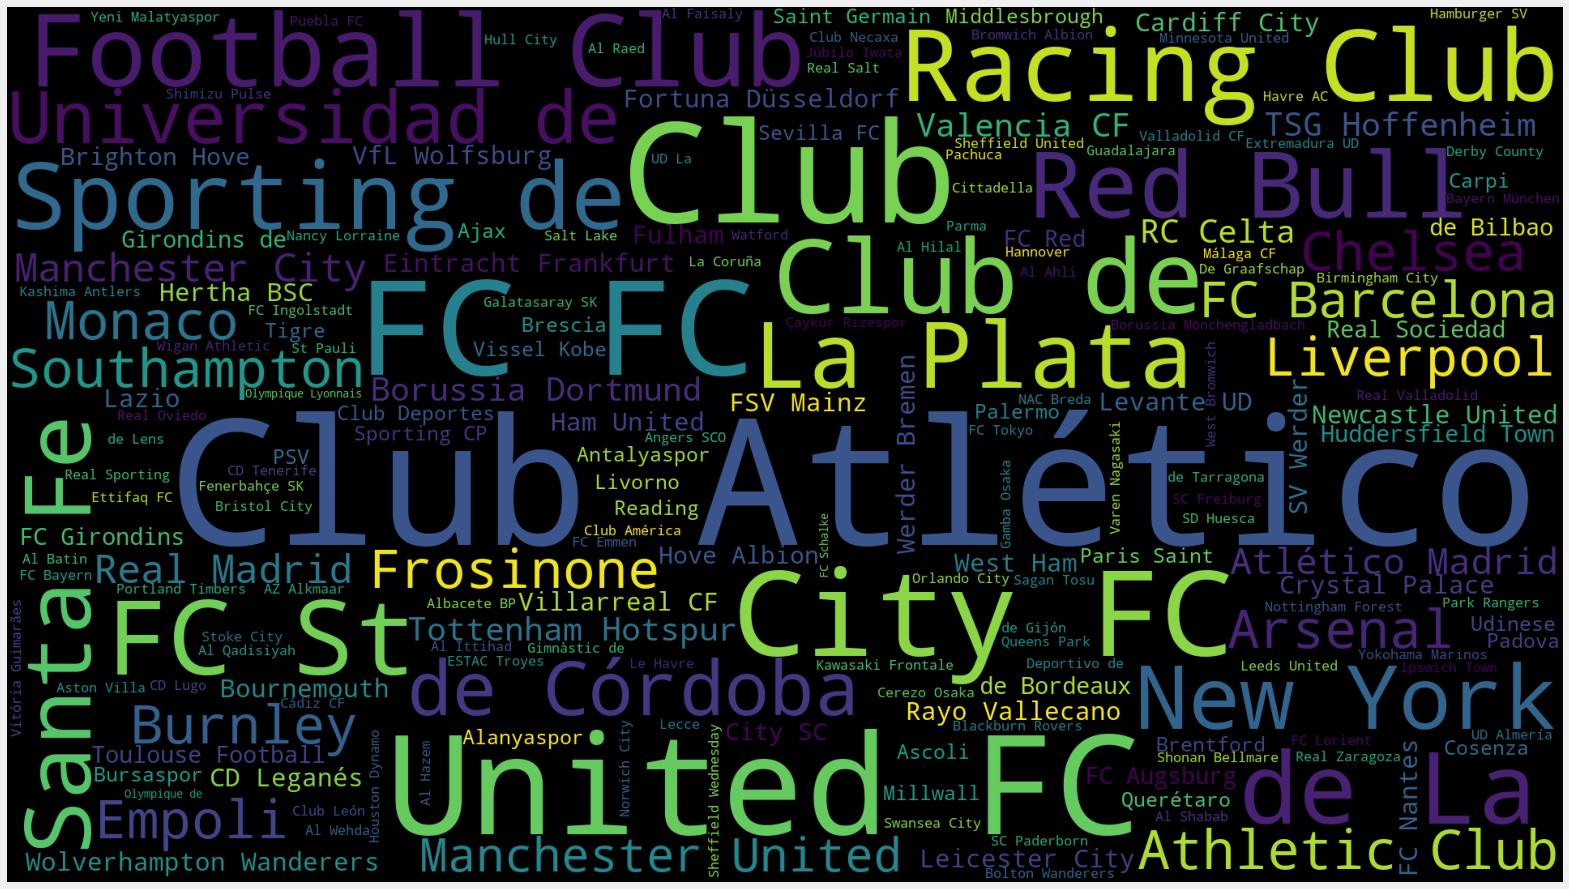

In [56]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

### Showing the name of the players which occurs the most number of times(left join)


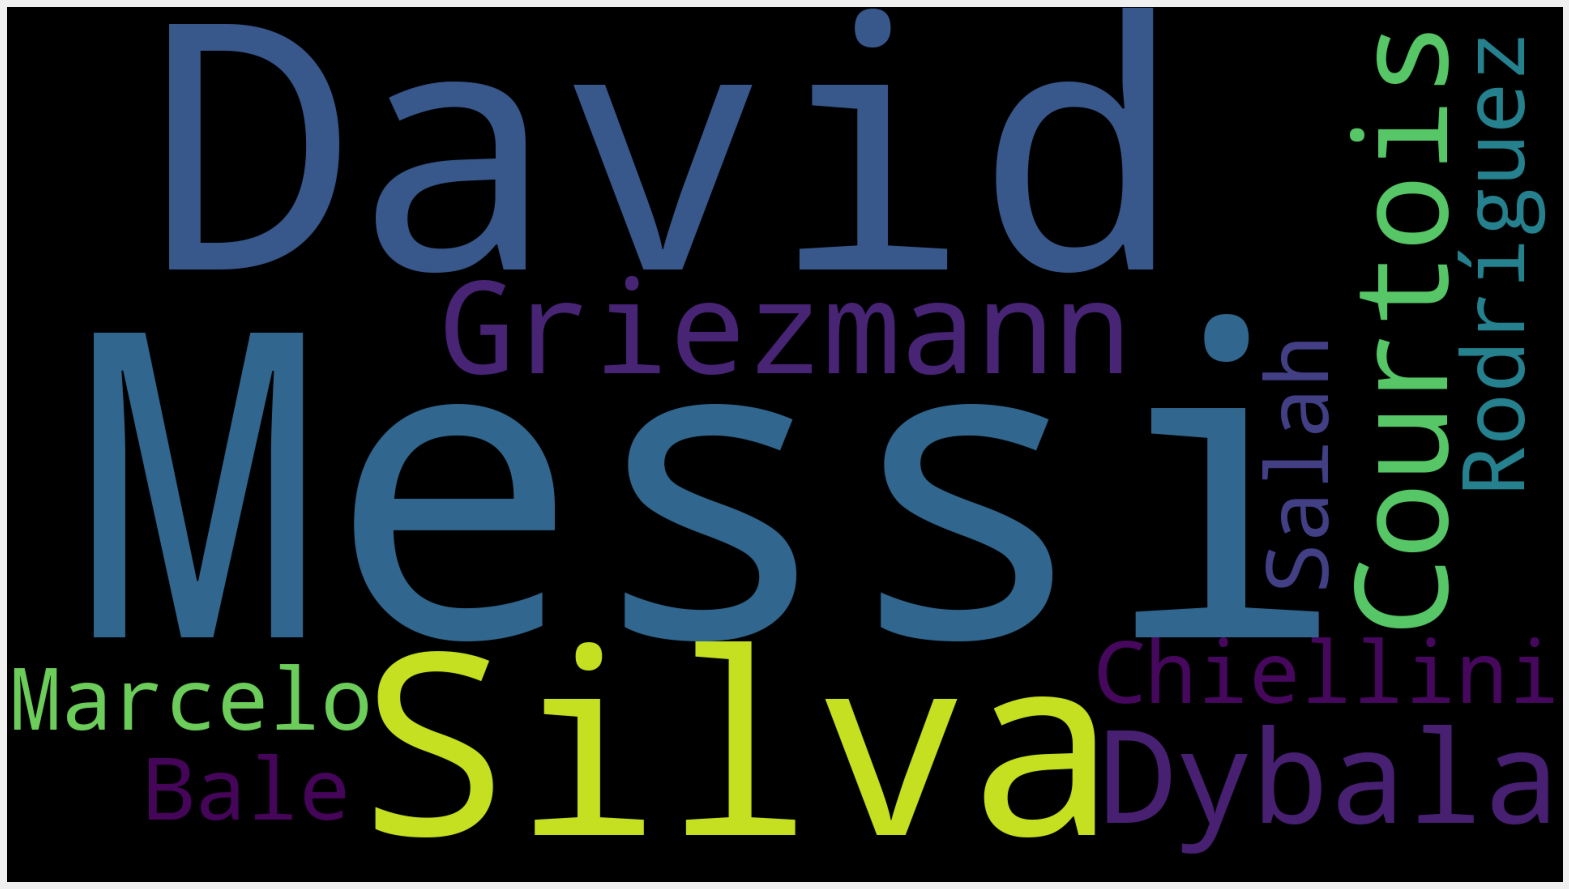

In [57]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(left.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

### Showing the name of the players which occurs the most number of times(right join)


In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(right.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

### Checking which player has been mentioned the most in the 'best' list that we have prepared


In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(best))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()